# Heart Failure Prediction 

#### Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

#### People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

#### This notebook leverages the dataset in Kaggle to train machine learning models to predict heart disease. Data Preprocessing, Exploratory Data Analysis, model training and visualization are demonstrated in this notebook. The performance of decision tree, random forest, K-nearest neighbour and support vector machine are compared.

Dataset: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/

In [1]:
import pandas as pd

df = pd.read_csv("./heart.csv")

In [2]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
# Preprocess the data

df['newSex'] = df['Sex'].map({'M': 1,'F': 0})
df['newChestPainType'] = df['ChestPainType'].map({'ASY':3, 'NAP':2, 'ATA': 1,'TA': 0})
df['newRestingECG'] = df['RestingECG'].map({'LVH':2, 'ST': 1,'Normal': 0})
df['newExerciseAngina'] = df['ExerciseAngina'].map({'Y': 1,'N': 0})
df['newST_Slope'] = df['ST_Slope'].map({'Down':2, 'Up': 1,'Flat': 0})
df.drop('Sex', axis=1, inplace=True)
df.drop('ChestPainType', axis=1, inplace=True)
df.drop('RestingECG', axis=1, inplace=True)
df.drop('ExerciseAngina', axis=1, inplace=True)
df.drop('ST_Slope', axis=1, inplace=True)
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,newSex,newChestPainType,newRestingECG,newExerciseAngina,newST_Slope
0,40,140,289,0,172,0.0,0,1,1,0,0,1
1,49,160,180,0,156,1.0,1,0,2,0,0,0
2,37,130,283,0,98,0.0,0,1,1,1,0,1
3,48,138,214,0,108,1.5,1,0,3,0,1,0
4,54,150,195,0,122,0.0,0,1,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,0,0,0,0
914,68,144,193,1,141,3.4,1,1,3,0,0,0
915,57,130,131,0,115,1.2,1,1,3,0,1,0
916,57,130,236,0,174,0.0,1,0,1,2,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   newSex             918 non-null    int64  
 8   newChestPainType   918 non-null    int64  
 9   newRestingECG      918 non-null    int64  
 10  newExerciseAngina  918 non-null    int64  
 11  newST_Slope        918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [18]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,newSex,newChestPainType,newRestingECG,newExerciseAngina,newST_Slope
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377,0.789760,2.251634,0.603486,0.404139,0.567538
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414,0.407701,0.931031,0.805968,0.490992,0.618959
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000,1.000000,3.000000,2.000000,1.000000,2.000000


In [17]:
# Distribution of the data

df.groupby('HeartDisease').size()

HeartDisease
0    410
1    508
dtype: int64

In [5]:
X=df.drop('HeartDisease',axis=1)
Y=df['HeartDisease']

#### Part 2: Tree-based Methods

In [6]:
# Split the data into training and testing sets
# Standardize the data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=3612)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [8]:
# Train a decision tree classifier to predict heart disease

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=2, random_state=3612)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=3612)

Accuracy of train set is:  0.8208722741433022
Accuracy of test set is:  0.7717391304347826


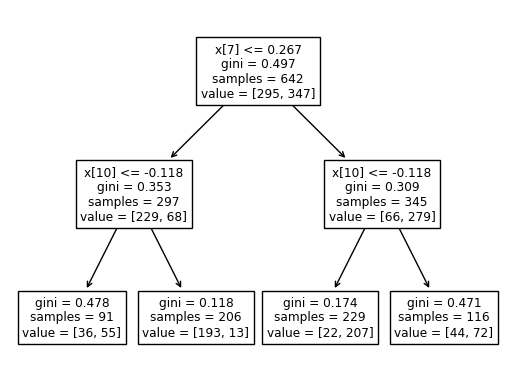

In [9]:
# Visualize the decision tree
# Calculate the accuracy of the model on the training and testing sets

from matplotlib import pylab as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text, plot_tree
import numpy as np

plot_tree(model)

predict_y_train = model.predict(X_train)
print("Accuracy of train set is: ", np.sum(y_train==predict_y_train)/y_train.shape[0])

predict_y_test = model.predict(X_test)
print("Accuracy of test set is: ", np.sum(y_test==predict_y_test)/y_test.shape[0])

Depth that acheives the maximum score:  3
Maximum score:  0.8369565217391305
The test score achieves its maximum when depth=3.
The resulting maximum score is 0.8369565217391305.
No, we shouldn't continue to increase the size as it would lead to overfitting and the accuracy of test score would start to decrease.


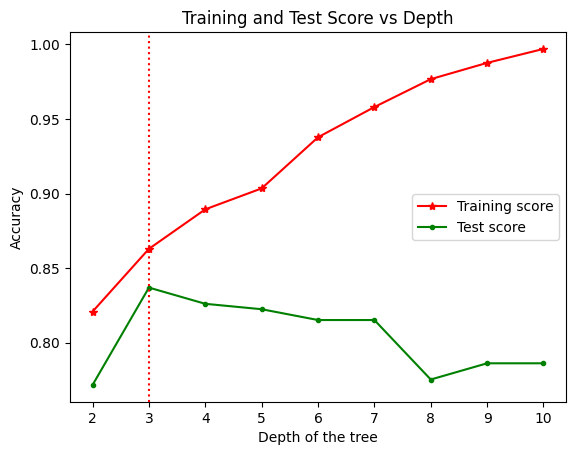

In [10]:
# Compare the accuracy of decision tree with different depths (2-10)

train_score = []
test_score = []
for i in range(2,11):
    model = DecisionTreeClassifier(max_depth=i, random_state=3612)
    model.fit(X_train, y_train)
    train_score.append(model.score(X_train, y_train))
    test_score.append(model.score(X_test, y_test))


Max_score = max(test_score)
print("Depth that acheives the maximum score: ", test_score.index(Max_score)+2)
print("Maximum score: ", max(test_score))

#plt.xlim(2,10)
#plt.ylim(0,1)

plt.xlabel("Depth of the tree")
plt.ylabel("Accuracy")
plt.title("Training and Test Score vs Depth")
plt.plot(list(range(2,11)),train_score, label="Training score", color="red", marker="*")
plt.plot(list(range(2,11)), test_score, label="Test score", color="green", marker=".")
plt.axvline(np.argmax(test_score)+2, linestyle="dotted", color="red")
plt.legend()


print("""The test score achieves its maximum when depth=3.
The resulting maximum score is 0.8369565217391305.
Hence, we shouldn't continue to increase the size as it would lead to overfitting and the accuracy of test score would start to decrease.""")

Depth that acheives the maximum score:  6
Maximum score:  0.8369565217391305
The test score achieves its maximum when depth=6.
No, we shouldn't continue to increase the depth as the model starts to overfit, indicated by the significant gap between the accuracy of training set and test set


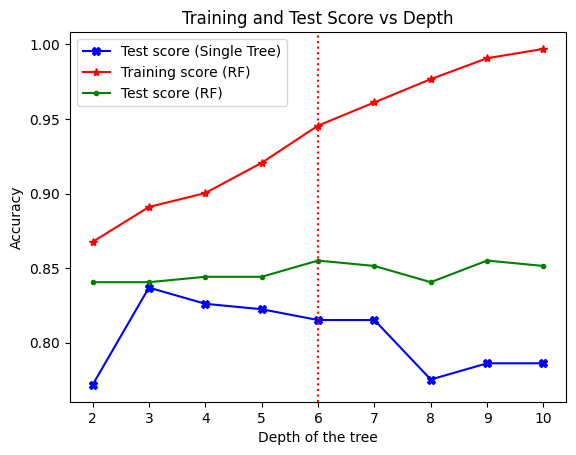

In [11]:
# Compare the accuracy of random forest classifier with different depths (2-10)

from sklearn.ensemble import RandomForestClassifier

train_score2 = []
test_score2 = []
for i in range(2,11):
    model = RandomForestClassifier(n_estimators=100, max_features=3, max_depth=i, random_state=3612)
    model.fit(X_train, y_train)
    train_score2.append(model.score(X_train, y_train))
    test_score2.append(model.score(X_test, y_test))
    


Max_score2 = max(test_score2)
Max_score2_index = np.argmax(test_score2)
print("Depth that acheives the maximum score: ", Max_score2_index+2)
print("Maximum score: ", max(test_score))
#plt.xlim(2,10)
#plt.ylim(0,1)

plt.xlabel("Depth of the tree")
plt.ylabel("Accuracy")
plt.title("Training and Test Score vs Depth")

plt.plot(list(range(2,11)), test_score, label="Test score (Single Tree)", color="blue", marker="X")
plt.plot(list(range(2,11)),train_score2, label="Training score (RF)", color="red", marker="*")
plt.plot(list(range(2,11)), test_score2, label="Test score (RF)", color="green", marker=".")
plt.axvline(np.argmax(test_score2)+2, linestyle="dotted", color="red")
plt.legend()


print(f"""The test score achieves its maximum when depth={Max_score2_index+2}.
No, we shouldn't continue to increase the depth as the model starts to overfit, indicated by the significant gap between the accuracy of training set and test set""")

#### Part 3: K-Nearest Neighbors

In [12]:
# Train a KNN classifier to predict heart disease

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)
predict_y = model.predict(X_test)
print("The accuracy on test set is :", np.sum(predict_y==y_test)/y_test.shape[0])
# ------------------

The accuracy on test set is : 0.8586956521739131


#### Part 4: Support Vector Machine

In [13]:
# Scale the data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
x = X[['Age', 'RestingBP']]

scaler2 = MinMaxScaler((-1,1))
scaler2.fit(x)
x = scaler2.transform(x)

In [14]:
# Train a SVM classifier to predict heart disease

from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, random_state=3612)
model = SVC(C=1, kernel="sigmoid")
model.fit(X_train, y_train)

SVC(C=1, kernel='sigmoid')

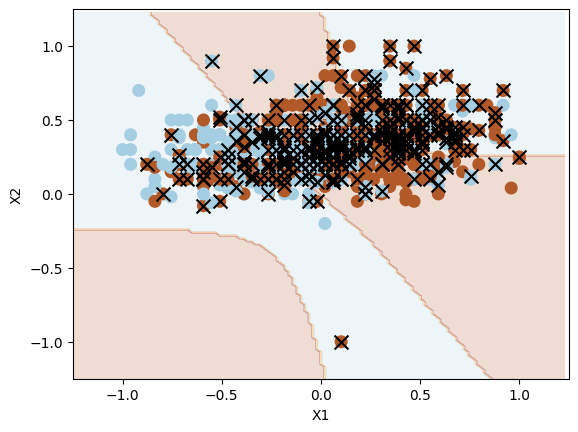

Number of support vectors:  378


In [15]:
# Visualize the decision boundary

import matplotlib as mpl
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min() - pad, X[:, 0].max() + pad
    y_min, y_max = X[:, 1].min() - pad, X[:, 1].max() + pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X[:, 0], X[:, 1], s=70, c=y, cmap=mpl.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:, 0], sv[:, 1], c='k', marker='x', s=100)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)
    

plot_svc(model, x, Y)


The accuracy of the test set is :  0.5597826086956522


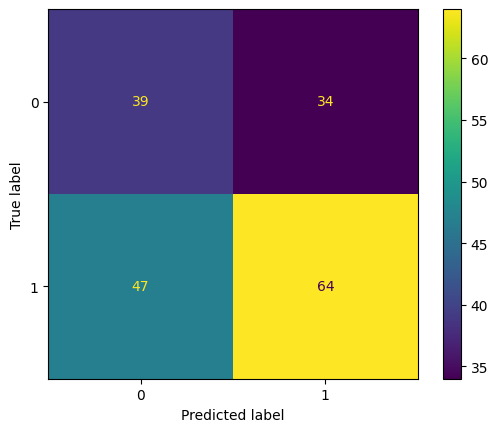

In [16]:
# Calculate the accuracy of the SVM classifier on test set
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

confusion_matrix = confusion_matrix(y_test, model.predict(X_test))
Display = ConfusionMatrixDisplay(confusion_matrix)
Display.plot()
print("The accuracy of the test set is : ", np.sum(y_test==model.predict(X_test))/y_test.shape[0])